# REGRESION LINEAL

# Suposiciones:

*   Relacion lineal
*   Normalidad
*   No multicolinealidad
*   No auto-correlacion
*   Varianzas iguales









Contexto y Datos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Clase 6/salarios-2022.xlsx")

datos.head()

datos.horas

0      40.905476
1      41.576483
2      41.369239
3      41.537211
4      40.441203
         ...    
995    41.110352
996    40.617061
997    40.798085
998    41.443604
999    41.402637
Name: horas, Length: 1000, dtype: float64

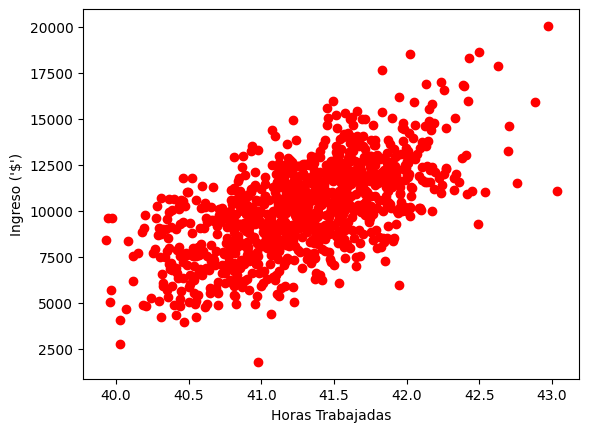

In [ ]:
plt.ylabel("Ingreso ('$')")
plt.xlabel("Horas Trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color= "red" )

plt.show()

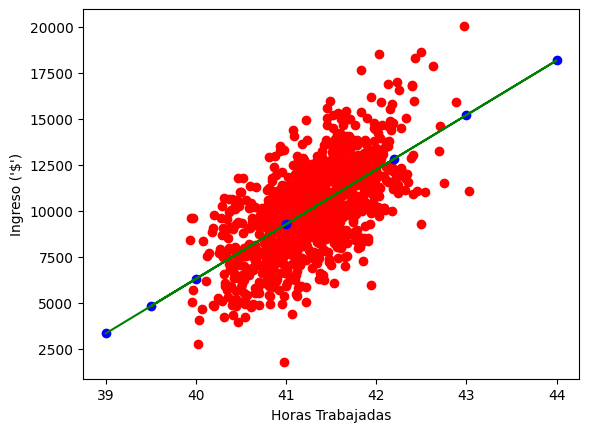

In [ ]:
from sklearn import linear_model

#Fase de tratamiento
regresion = linear_model.LinearRegression()

horas = datos["horas"].values.reshape((-1, 1))

#Fase de entrenamiento
modelo = regresion.fit(horas, datos["ingreso"])


#Fase de prediccion
entrada = [[39], [40], [43], [44], [41], [39.5], [42.2]]
modelo.predict(entrada)

#Fase de visualizacion
plt.scatter(datos["horas"], datos["ingreso"], color= "red" )
plt.scatter(entrada, modelo.predict(entrada), color="blue")
plt.plot(entrada, modelo.predict(entrada), color="green")

plt.ylabel("Ingreso ('$')")
plt.xlabel("Horas Trabajadas")


plt.show()

# REGRESION LOGISTICA

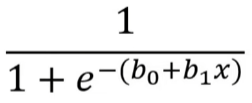

In [ ]:
#El numero 1 esta para que los valores sean acotados entre 0 y 1
#e numero de euler, elevado a un exponente (la ecuacion de la linea recta)
#Se puede ver como estan muy relacionados los modelos de regresion Lineal y regresion Logistica

import numpy as np
import matplotlib.pyplot as plt
import math


#Creamos una funcion logistica vectorial (ufuncs)

logistica = np.frompyfunc(lambda b0 , b1, x:
                          1 / (1 + math.exp(-(b0 + b1*x))),
                          3, 1)

#Asumimos que vamos a trabajar con grandes cantidades de datos, por lo que
#usamos funciones vectoriales, o universales, o bien ufuncs. Son altamente
#eficientes.
#Lo que recibe de parametro sera una funcion anonima (lambda)
#el segundo parametro es la cantidad de parametros que recibe esta funcion
#osea 3, y tiene 1 parametro de salida
#todo esto es caracteristico de las funciones creadas con frompyfunc


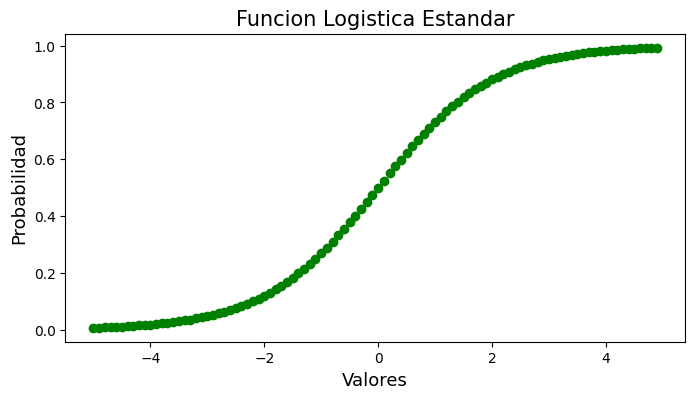

In [ ]:
plt.figure (figsize = (8, 4))
plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 1, np.arange(-5, 5, 0.1)),
            color="green")

plt.title("Funcion Logistica Estandar", fontsize= 15.0)
plt.ylabel("Probabilidad", fontsize= 13.0)
plt.xlabel("Valores", fontsize= 13.0)

plt.show()

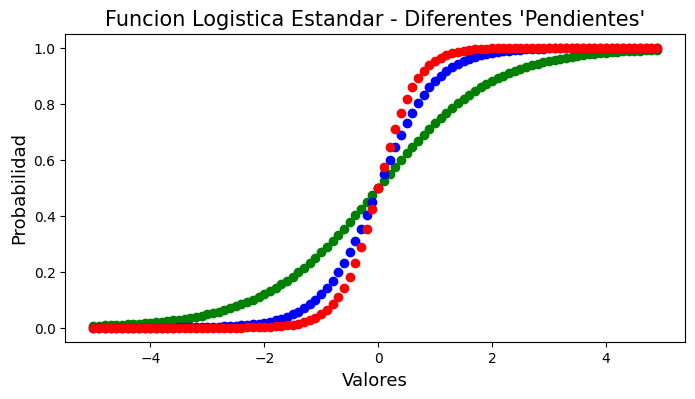

In [ ]:
#Graficamos la funcion logistica con diferentes pendientes

plt.figure (figsize = (8, 4))

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 1, np.arange(-5, 5, 0.1)),
            color="green")

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 2, np.arange(-5, 5, 0.1)),
            color="blue")

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 3, np.arange(-5, 5, 0.1)),
            color="red")

plt.title("Funcion Logistica Estandar - Diferentes 'Pendientes'", fontsize= 15.0)
plt.ylabel("Probabilidad", fontsize= 13.0)
plt.xlabel("Valores", fontsize= 13.0)

plt.show()

## Caso Practico - Taquicardia (Probabilidad y Clase)

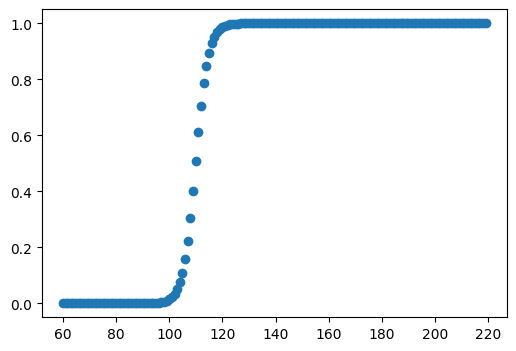

In [ ]:
#Graficamos una funcion logistica

plt.figure(figsize = (6,4))


# y = b0 + b1x
#Los siguientes datos, ya fueron calculados...
#Mas adelante veremos como se hace
#y = -46.68057196 + 0.42460226x

plt.scatter(np.arange(60, 220, 1),
            logistica(-46.68057196, 0.42460226,
                      np.arange(60, 220, 1)))

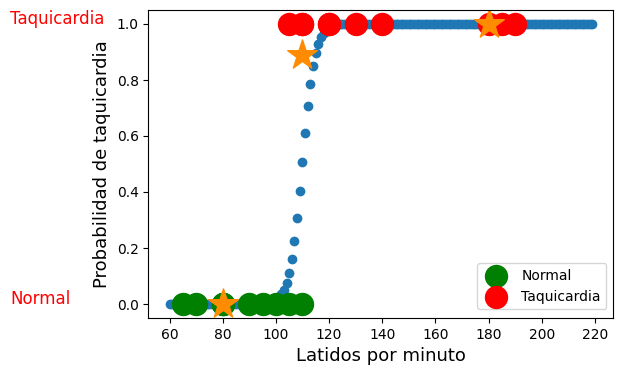

In [ ]:
#Persona Normal de 60 a 100 latidos por minuto
#Persona con Taquicardia hasta 220 latidos por minuto

persona_normal = [65,70,80,80,80,
                  90,95,100,105,110]

persona_taquicardia = [105,110,110,120,120,
                       130,140,180,185,190]

#Graficamos una funcion logistica

plt.figure(figsize = (6,4))


# y = b0 + b1x
#Los siguientes datos, ya fueron calculados...
#Mas adelante veremos como se hace
#y = -46.68057196 + 0.42460226x

plt.scatter(np.arange(60, 220, 1),
            logistica(-46.68057196, 0.42460226,
                      np.arange(60, 220, 1)))

#Graficamos la frecuencia cardiaca de las personas
plt.scatter (persona_normal, [0]*10,
             marker="o", c="green", s=250, label="Normal")
plt.scatter (persona_taquicardia, [1]*10,
             marker="o", c="red", s=250, label="Taquicardia")

#Graficamos las probabilidades para 3 individuos

individuos = [80, 110, 180]

probabilidades = logistica(-47.31587794, 0.44906067,
                           individuos)

plt.scatter(individuos, probabilidades,
            marker="*", c="darkorange", s=500)

plt.text(0, 1, "Taquicardia", size=12, color="red")
plt.text(0, 0, "Normal", size=12, color="red")

plt.ylabel("Probabilidad de taquicardia", fontsize=13.0)
plt.xlabel("Latidos por minuto", fontsize=13.0)

plt.legend(bbox_to_anchor=(1, 0.2))

plt.show()

# Maxima Verosimilitud

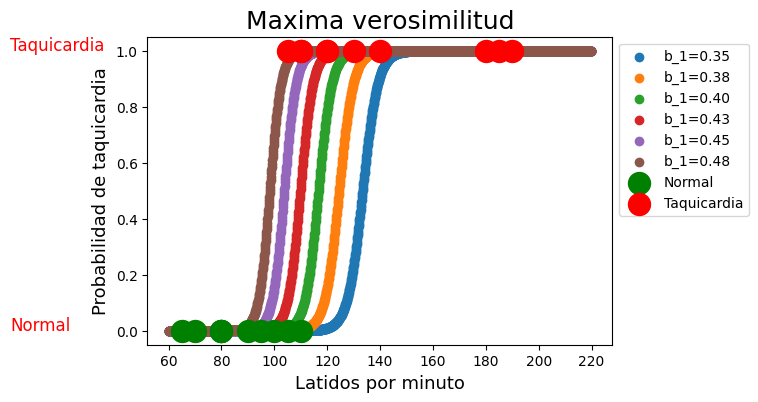

In [ ]:
# Diferentes funciones logísticas con diferentes "pendientes"
plt.figure(figsize= (6,4))

for b1 in np.arange(0.35, 0.49, 0.025):
  plt.scatter(np.arange(60, 220, 0.1),
              logistica(-46.68057196, b1,np.arange(60, 220, 0.1)),
              label = "b_1=%0.2f" % b1)

# Graficamos la frecuencia cardíaca de las personas

plt.scatter (persona_normal, [0]*10,
             marker="o", c="green", s=250, label="Normal")
plt.scatter (persona_taquicardia, [1]*10,
             marker="o", c="red", s=250, label="Taquicardia")


plt.title("Maxima verosimilitud", fontsize= 18.0)
plt.text(0, 0, "Normal", size= 12.0, color="red")
plt.text(0, 1, "Taquicardia", size= 12.0, color="red")
plt.ylabel("Probabilidad de taquicardia", fontsize=13.0)
plt.xlabel("Latidos por minuto", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

###Si vemos el modelo azul, con la pendiente dispuesta, veremos como quedan afuera de nuestras categorias individuos que si deberian estar incluidos.
###En cambio el modelo verde es quizas el que mas individuos incluye, por lo que seria un modelo ideal para utilizar...
###Dada una cierta linea de una funcion logistica, calcula la probabilidad de cada uno de los individuos y, aquella funcion logistica que tenga una mayor probabilidad de categorizar los individuos correctamente sera seleccionada. En otras palabras esto seria nuestra la maxima verosimilitud.

#Modelo de Regresion Logistica

In [ ]:
#Importamos al creador de modelos de regresion logistica
from sklearn.linear_model import LogisticRegression

#Importamos modulos que nos permiten separar entre datos de entranamiento y datos de prueba
from sklearn.model_selection import train_test_split

frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

#Vemos que tenemos una lista de listas, ya que un modelo de regresion logistica podria tener
#muchas variables

#Vector de nuestra clase
#Los ceros corresponden a los individuos sin taquicardia y los 1 a los que si tienen
#Importante es que debemos tener una relacion 1 a 1
clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Creamos conjuntos de entrenamiento y de prueba del modelo
datos_entrena, datos_prueba, clase_entrena, clase_prueba = \
train_test_split(frecuencias_cardiacas,clase,test_size=0.30)

#Indicamos al algoritmo que el 30% de nuestros datos seran utilizados para prueba

# Creamos el modelo de Regresión Logística
modelo=LogisticRegression().fit(datos_entrena, clase_entrena)

#suprimimos la notacion cientifica para poder visualizar numeros mas "normales"
np.set_printoptions(suppress=True)

#utilizamos nuestro modelo para introducir los datos de prueba (los que no fueron incluidos
#en la creacion de nuestro modelo)
print(datos_prueba)
print(modelo.predict(datos_prueba))

#imprimimos la probabilidad de los individuos de pertenecer a la clase "taquicardia"
print(modelo.predict_proba(datos_prueba))

#usamos la metrica accuracy para ver cuantos elementos clasifico correctamente
print(modelo.score(datos_prueba, clase_prueba))

#obtenemos nuestros valores b0 y b1
print(modelo.intercept_,modelo.coef_)

[[120], [185], [95], [110], [100], [140]]
[1 1 0 1 0 1]
[[0.05988443 0.94011557]
 [0.00000005 0.99999995]
 [0.93559702 0.06440298]
 [0.35853192 0.64146808]
 [0.83063056 0.16936944]
 [0.00082667 0.99917333]]
1.0
[-23.30854776] [[0.21718445]]
